About Dataset

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [7]:
dataset['Loan_Status'] = dataset['Loan_Status'].astype(str)
#Replace ALL wrong values with N 
dataset.loc[~dataset['Loan_Status'].isin(['Y', 'N']), 'Loan_Status'] = 'N'
dataset['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [8]:
dataset['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [9]:
index = dataset['Loan_Status'].value_counts().index
value = dataset['Loan_Status'].value_counts().values

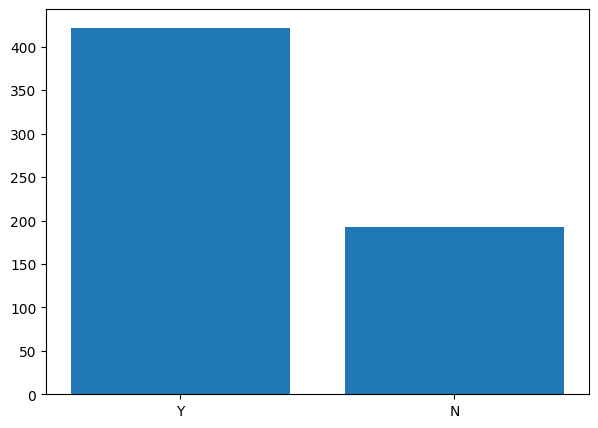

In [10]:
plt.figure(figsize=(7,5))
plt.bar(index,value)
plt.show()

In [11]:
dataset.duplicated().sum()

np.int64(0)

#Handle Null Values

In [12]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])   
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())

In [14]:
dataset.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [16]:
value = dataset['Dependents'].value_counts().index[0]
value

'0'

In [17]:
dataset['Dependents'] = dataset['Dependents'].fillna(value)

In [18]:
dataset['Dependents'].replace('3+','3',inplace=True)
dataset['Dependents']=dataset['Dependents'].astype('int64')

C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_1808\3687141019.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Dependents'].replace('3+','3',inplace=True)


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [20]:
dataset['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [21]:
value = dataset['Credit_History'].value_counts().index[0]
value

np.float64(1.0)

In [22]:
dataset['Credit_History'] = dataset['Credit_History'].fillna(value)

In [23]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
dataset.drop('Loan_ID',axis=1,inplace=True)

In [25]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
dataset['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [27]:
dataset['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Data Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [30]:
le = LabelEncoder()

In [31]:
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Married'] = le.fit_transform(dataset['Married'])
dataset['Education'] = le.fit_transform(dataset['Education'])
dataset['Self_Employed'] = le.fit_transform(dataset['Self_Employed'])

In [32]:
oe = OrdinalEncoder(categories=[['Rural','Semiurban','Urban']],dtype='int')  #Data is Ordinal so use OrdinalEncoder

In [33]:
dataset['Property_Area'] = oe.fit_transform(dataset[['Property_Area']])

In [34]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


In [35]:
dataset.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


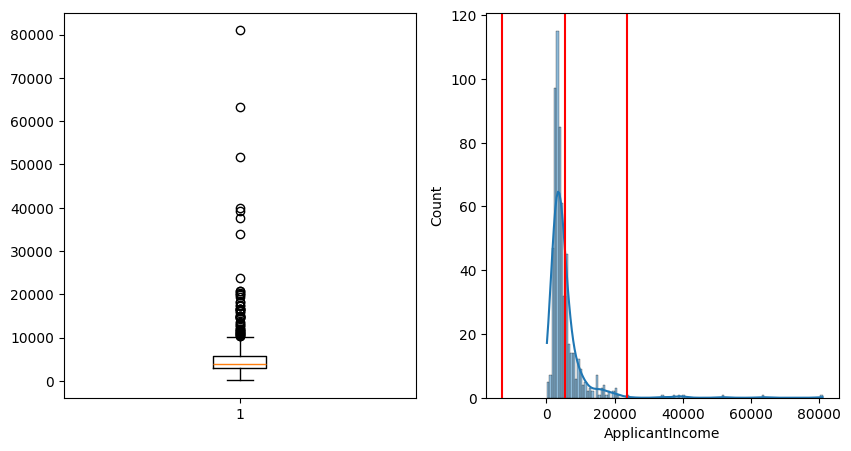

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(dataset['ApplicantIncome'])
plt.subplot(1,2,2)
sns.histplot(dataset['ApplicantIncome'],kde=True)
mean = dataset['ApplicantIncome'].mean()
std = dataset['ApplicantIncome'].std()
plt.axvline(mean,color='red')
plt.axvline(mean+3*std,color='red')
plt.axvline(mean-3*std,color='red')
plt.show()

In [37]:
dataset[dataset['ApplicantIncome']>mean+3*std].shape

(8, 12)

In [38]:
upper =  mean+3*std

In [39]:
dataset.loc[dataset['ApplicantIncome'] > upper, 'ApplicantIncome'] = upper
dataset[dataset['ApplicantIncome']>mean+3*std].shape

C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_1808\344752089.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23730.584303549156' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['ApplicantIncome'] > upper, 'ApplicantIncome'] = upper


(0, 12)

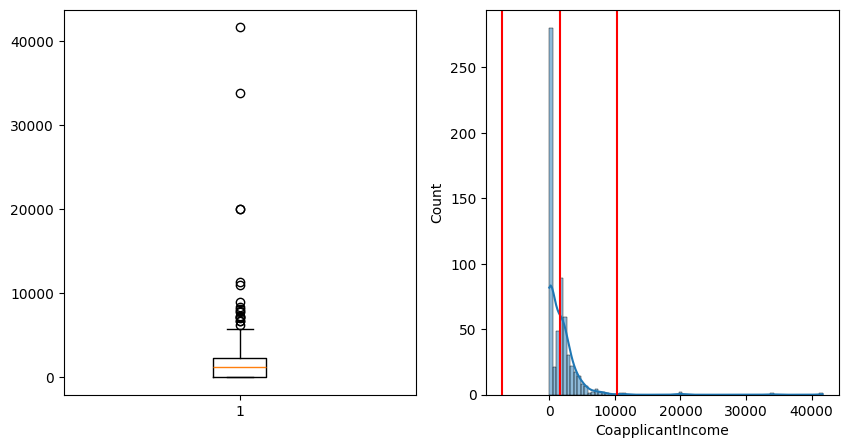

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(dataset['CoapplicantIncome'])
plt.subplot(1,2,2)
sns.histplot(dataset['CoapplicantIncome'],kde=True)
mean = dataset['CoapplicantIncome'].mean()
std = dataset['CoapplicantIncome'].std()
plt.axvline(mean,color='red')
plt.axvline(mean+3*std,color='red')
plt.axvline(mean-3*std,color='red')
plt.show()

In [41]:
dataset[dataset['CoapplicantIncome']>mean+3*std].shape

(6, 12)

In [42]:
upper =  mean+3*std

In [43]:
dataset[dataset['CoapplicantIncome']>upper] = upper

C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_1808\1394164658.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10399.990905699668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset[dataset['CoapplicantIncome']>upper] = upper
C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_1808\1394164658.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10399.990905699668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset[dataset['CoapplicantIncome']>upper] = upper
C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_1808\1394164658.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10399.990905699668' has dtype incompatible with int64, pleas

In [44]:
dataset[dataset['CoapplicantIncome']>mean+3*std].shape

(0, 12)

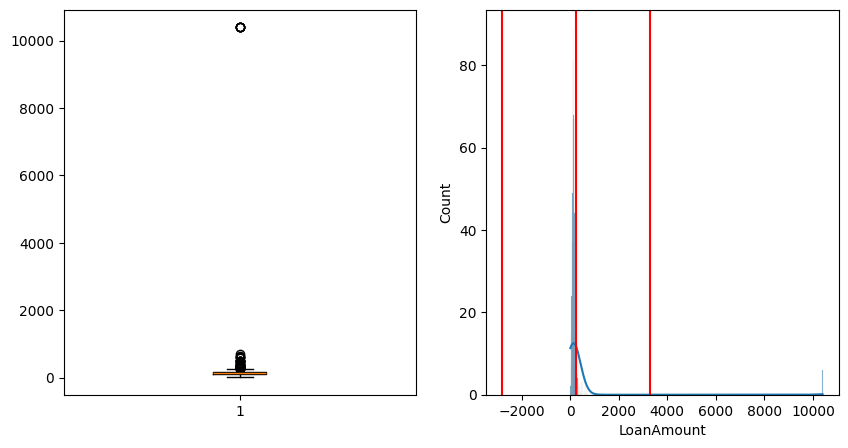

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(dataset['LoanAmount'])
plt.subplot(1,2,2)
sns.histplot(dataset['LoanAmount'],kde=True)
mean = dataset['LoanAmount'].mean()
std = dataset['LoanAmount'].std()
plt.axvline(mean,color='red')
plt.axvline(mean+3*std,color='red')
plt.axvline(mean-3*std,color='red')
plt.show()

In [46]:
dataset[dataset['LoanAmount']>mean+3*std].shape

(6, 12)

In [47]:
dataset[dataset['LoanAmount']>mean+3*std]=mean+3*std
dataset[dataset['LoanAmount']>mean+3*std].shape

(0, 12)

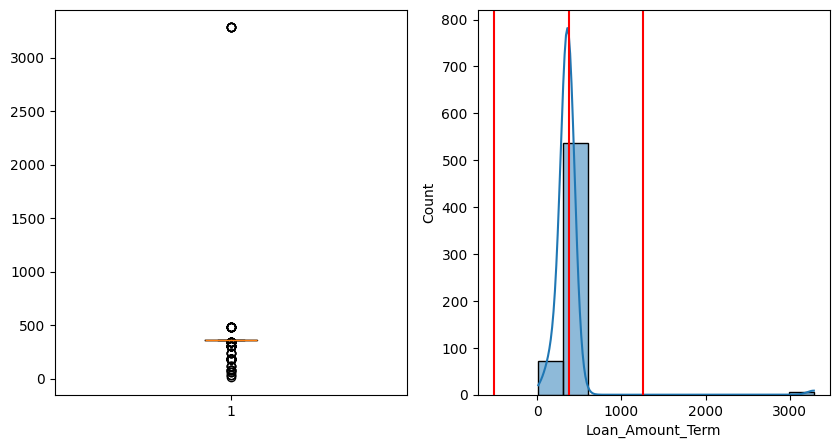

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(dataset['Loan_Amount_Term'])
plt.subplot(1,2,2)
sns.histplot(dataset['Loan_Amount_Term'],kde=True)
mean = dataset['Loan_Amount_Term'].mean()
std = dataset['Loan_Amount_Term'].std()
plt.axvline(mean,color='red')
plt.axvline(mean+3*std,color='red')
plt.axvline(mean-3*std,color='red')
plt.show()

In [49]:
dataset[dataset['Loan_Amount_Term']>mean+3*std].shape

(6, 12)

In [50]:
dataset[dataset['Loan_Amount_Term']>mean+3*std]=mean+3*std
dataset[dataset['Loan_Amount_Term']>mean+3*std].shape

(0, 12)

In [51]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,Y
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,N
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,Y
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,Y
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,Y


In [52]:
dataset['Loan_Status'].unique()

array(['Y', 'N', np.float64(1260.7415432330108)], dtype=object)

In [53]:
dataset['Loan_Status'] = dataset['Loan_Status'].astype(str)
#Replace ALL wrong values with N 
dataset.loc[~dataset['Loan_Status'].isin(['Y', 'N']), 'Loan_Status'] = 'N'
dataset['Loan_Status'].value_counts()

Loan_Status
Y    421
N    193
Name: count, dtype: int64

#Divide Data into Input and Output

In [54]:
X = dataset.drop('Loan_Status',axis=1)
y = dataset['Loan_Status']

In [55]:
y.value_counts()

Loan_Status
Y    421
N    193
Name: count, dtype: int64

#Split Data for training and testing 

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [58]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [59]:
#Cross Validation
from sklearn.model_selection import cross_validate
val_result = cross_validate(knn,x_train,y_train)
val_result['test_score'].mean()

np.float64(0.6212121212121212)

In [60]:
pred = knn.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6422764227642277

In [62]:
print('Cross Validation of Model Training :',val_result['test_score'].mean())
print('Accuracy:',accuracy_score(y_test,pred))

Cross Validation of Model Training : 0.6212121212121212
Accuracy: 0.6422764227642277


In [63]:
#HyperParameterTunning
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[5,7,9,11],
             "metric":["euclidean","cosine","manhattan","minkowski"]}
gcv = GridSearchCV(knn,parameters)
gcv.fit(x_train,y_train)
gcv.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [64]:
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')

In [65]:
knn.fit(x_train,y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [66]:
pred_test = knn.predict(x_test)

In [67]:
accuracy_score(y_test,pred_test)

0.6666666666666666

In [68]:
#Cross Validation
from sklearn.model_selection import cross_validate
val_result = cross_validate(knn,x_train,y_train)
val_result

{'fit_time': array([0.00288844, 0.00359106, 0.00285077, 0.00263119, 0.00227046]),
 'score_time': array([0.00420237, 0.00340533, 0.00481486, 0.00285411, 0.00343895]),
 'test_score': array([0.66666667, 0.65306122, 0.67346939, 0.67346939, 0.70408163])}

In [69]:
val_result['test_score'].mean()

np.float64(0.6741496598639456)

In [70]:
print('---After Hyperparameter Tunning---')
print('Cross Validation:',val_result['test_score'].mean())
print('Accuracy:',accuracy_score(y_test,pred_test))

---After Hyperparameter Tunning---
Cross Validation: 0.6741496598639456
Accuracy: 0.6666666666666666


In [71]:
#Handle Embalanced Data with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(X,y)
y_sm.value_counts()

Loan_Status
Y    421
N    421
Name: count, dtype: int64

In [72]:
xsm_train,xsm_test,ysm_train,ysm_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=24)

In [73]:
knn = KNeighborsClassifier()
knn.fit(xsm_train,ysm_train)
pred_test = knn.predict(xsm_test)
accuracy_score(ysm_test,pred_test)

0.6035502958579881

In [74]:
print('---After Handle Embalanced Data---')
print('Cross Validation:',val_result['test_score'].mean())
print('Accuracy:',accuracy_score(ysm_test,pred_test))

---After Handle Embalanced Data---
Cross Validation: 0.6741496598639456
Accuracy: 0.6035502958579881


Using KNN the Highest Accuracy is 67%

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [77]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
#Cross Validation
val_result = cross_validate(dt,x_train,y_train)
val_result['test_score'].mean()

np.float64(0.6843743558029273)

In [79]:
pred_test = dt.predict(x_test)
accuracy_score(y_test,pred_test)

0.7723577235772358

In [80]:
print('Cross Validation:',val_result['test_score'].mean())
print('Accuracy:',accuracy_score(y_test,pred_test))

Cross Validation: 0.6843743558029273
Accuracy: 0.7723577235772358


In [81]:
#Use balanced data
dt = DecisionTreeClassifier()
dt.fit(xsm_train,ysm_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [82]:
#Cross Validation
val_result = cross_validate(dt,xsm_train,ysm_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.7711221669430623)

In [83]:
pred_test = dt.predict(xsm_test)
accuracy = accuracy_score(ysm_test,pred_test)
accuracy

0.8106508875739645

In [84]:
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

Cross Validation: 0.7711221669430623
Accuracy: 0.8106508875739645


In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
#Cross Validation
val_result = cross_validate(rf,x_train,y_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.7943310657596372)

In [87]:
test_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test,test_pred)
accuracy

0.8048780487804879

In [88]:
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

Cross Validation: 0.7943310657596372
Accuracy: 0.8048780487804879


In [89]:
rf = RandomForestClassifier()
parameter = {'n_estimators':[100,120,150,200]}
gcv = GridSearchCV(rf,parameter)
gcv.fit(x_train,y_train)
gcv.best_params_

{'n_estimators': 150}

In [90]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [91]:
#Cross Validation
val_result = cross_validate(rf,x_train,y_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.788229231086374)

In [92]:
test_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test,test_pred)
accuracy

0.7886178861788617

In [93]:
print('---After Hyperparameter Tunning---')
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

---After Hyperparameter Tunning---
Cross Validation: 0.788229231086374
Accuracy: 0.7886178861788617


In [94]:
rf = RandomForestClassifier()
rf.fit(xsm_train,ysm_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [95]:
#Cross Validation
val_result = cross_validate(rf,xsm_train,ysm_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.81869541182974)

In [96]:
pred_test = rf.predict(xsm_test)
accuracy = accuracy_score(ysm_test,pred_test)
accuracy

0.9053254437869822

In [97]:
print('---After Using Balanced Data---')
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

---After Using Balanced Data---
Cross Validation: 0.81869541182974
Accuracy: 0.9053254437869822


In [98]:
from sklearn.svm import SVC
svc = SVC()

In [99]:
svc.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [100]:
#Cross Validation
val_result = cross_validate(svc,x_train,y_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.7026386312100596)

In [101]:
test_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,test_pred)
accuracy

0.6666666666666666

In [102]:
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

Cross Validation: 0.7026386312100596
Accuracy: 0.6666666666666666


In [103]:
svc = SVC()
svc.fit(xsm_train,ysm_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [104]:
#Cross Validation
val_result = cross_validate(svc,xsm_train,ysm_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.4963736871199558)

In [105]:
pred_test = svc.predict(xsm_test)
accuracy = accuracy_score(ysm_test,pred_test)
accuracy

0.5562130177514792

In [106]:
print('---After Using Balanced Data---')
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

---After Using Balanced Data---
Cross Validation: 0.4963736871199558
Accuracy: 0.5562130177514792


Using Support Vector Machine Highest Accuracy 66%

In [107]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [109]:
lr.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [110]:
#Cross Validation
val_result = cross_validate(lr,x_train_scaled,y_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.7026386312100596)

In [111]:
pred_test = lr.predict(x_test_scaled)
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.6666666666666666

In [112]:
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

Cross Validation: 0.7026386312100596
Accuracy: 0.6666666666666666


In [113]:
lr = LogisticRegression()

In [114]:
x_train_scaled = sc.fit_transform(xsm_train)
x_test_scaled = sc.transform(xsm_test)

In [115]:
lr.fit(x_train_scaled,ysm_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [116]:
#Cross Validation
val_result = cross_validate(lr,x_train_scaled,ysm_train)
val_result = val_result['test_score'].mean()
val_result

np.float64(0.5527252625760088)

In [117]:
pred_test = lr.predict(x_test_scaled)
accuracy = accuracy_score(ysm_test,pred_test)
accuracy

0.621301775147929

In [118]:
print('---After Using Balanced Data---')
print('Cross Validation:',val_result)
print('Accuracy:',accuracy)

---After Using Balanced Data---
Cross Validation: 0.5527252625760088
Accuracy: 0.621301775147929


Using LogisticRegression Highest Accuracy is 66%

Conclusion:
Based on the model accuracy results, the Random Forest algorithm achieves the highest accuracy. Therefore, it is the best-performing model for the Loan Prediction dataset.